# Import Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mtp
import sklearn

In [54]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1mfUrBZXNXedJeOJMz4P9zJkfDzxFuKdNzVPR-6_n6cM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-5vceqmhls7eowb'
object_key = 'university.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,S.NO,University Name,District,12th Percentage,Entrance Percentage,Department,Output
0,1,Aligarh Muslim University,Aligarh,55,80,Computer Science and Engineering,Yes
1,2,Aligarh Muslim University,Aligarh,85,80,Computer Science and Engineering,Yes
2,3,Aligarh Muslim University,Aligarh,74,80,Computer Science and Engineering,Yes
3,4,Aligarh Muslim University,Aligarh,92,80,Computer Science and Engineering,Yes
4,5,Aligarh Muslim University,Aligarh,19,80,Computer Science and Engineering,No


In [55]:
df1 = df
df1.head()

,S.NO,University Name,District,12th Percentage,Entrance Percentage,Department,Output
0,1,Aligarh Muslim University,Aligarh,55,80,Computer Science and Engineering,Yes
1,2,Aligarh Muslim University,Aligarh,85,80,Computer Science and Engineering,Yes
2,3,Aligarh Muslim University,Aligarh,74,80,Computer Science and Engineering,Yes
3,4,Aligarh Muslim University,Aligarh,92,80,Computer Science and Engineering,Yes
4,5,Aligarh Muslim University,Aligarh,19,80,Computer Science and Engineering,No


In [56]:
df1.isnull().sum()

S.NO                   0
University Name        0
District               0
12th Percentage        0
Entrance Percentage    0
Department             0
Output                 0
dtype: int64

In [57]:
df1.shape

(789, 7)

In [58]:
df1.describe()

,S.NO,12th Percentage,Entrance Percentage
count,789.000000,789.000000,789.000000
mean,395.000000,54.370089,56.032953
std,227.908973,20.710659,8.943076
min,1.000000,9.000000,40.000000
25%,198.000000,39.000000,50.000000
50%,395.000000,52.000000,55.000000
75%,592.000000,72.000000,60.000000
max,789.000000,96.000000,80.000000


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   S.NO                 789 non-null    int64 
 1   University Name      789 non-null    object
 2   District             789 non-null    object
 3   12th Percentage      789 non-null    int64 
 4   Entrance Percentage  789 non-null    int64 
 5   Department           789 non-null    object
 6   Output               789 non-null    object
dtypes: int64(3), object(4)
memory usage: 43.3+ KB


# Univariate Analysis

<AxesSubplot:xlabel='12th Percentage', ylabel='Density'>

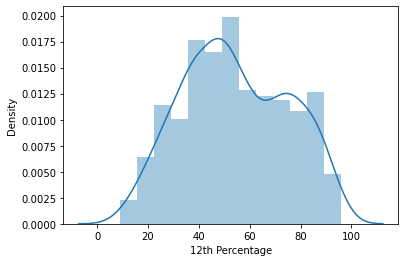

In [60]:
sns.distplot(df1['12th Percentage']) 

# Bivariate Analysis


<AxesSubplot:xlabel='12th Percentage', ylabel='Entrance Percentage'>

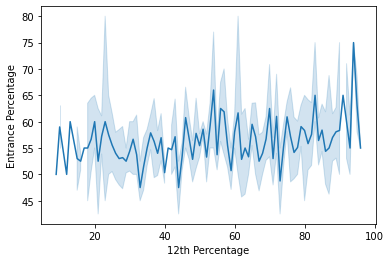

In [61]:
sns.lineplot(df1['12th Percentage'],df1['Entrance Percentage'])   

# Multi variate Analysis


<AxesSubplot:xlabel='Entrance Percentage', ylabel='Department'>

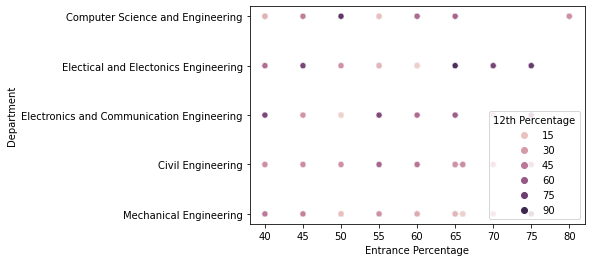

In [62]:
sns.scatterplot(df1['Entrance Percentage'],df1['Department'],hue = df1['12th Percentage'])   

In [63]:
df = df1.drop(['District'],axis=1)
df.head()

,S.NO,University Name,12th Percentage,Entrance Percentage,Department,Output
0,1,Aligarh Muslim University,55,80,Computer Science and Engineering,Yes
1,2,Aligarh Muslim University,85,80,Computer Science and Engineering,Yes
2,3,Aligarh Muslim University,74,80,Computer Science and Engineering,Yes
3,4,Aligarh Muslim University,92,80,Computer Science and Engineering,Yes
4,5,Aligarh Muslim University,19,80,Computer Science and Engineering,No


# Descriptive Statistics


In [64]:
df1.mean()

S.NO                   395.000000
12th Percentage         54.370089
Entrance Percentage     56.032953
dtype: float64

In [65]:
df1.median()

S.NO                   395.0
12th Percentage         52.0
Entrance Percentage     55.0
dtype: float64

In [66]:
df1.mode()

,S.NO,University Name,District,12th Percentage,Entrance Percentage,Department,Output
0,1,Chandigarh University,New Delhi,50.0,55.0,Computer Science and Engineering,Yes
1,2,NaN,NaN,NaN,NaN,Mechanical Engineering,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
784,785,NaN,NaN,NaN,NaN,NaN,NaN
785,786,NaN,NaN,NaN,NaN,NaN,NaN
786,787,NaN,NaN,NaN,NaN,NaN,NaN
787,788,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df1.var()

S.NO                   51942.500000
12th Percentage          428.931388
Entrance Percentage       79.978608
dtype: float64

In [68]:
df1.std()

S.NO                   227.908973
12th Percentage         20.710659
Entrance Percentage      8.943076
dtype: float64

In [69]:
df1.min()

S.NO                                           1
University Name        Aligarh Muslim University
District                                 Aligarh
12th Percentage                                9
Entrance Percentage                           40
Department                     Civil Engineering
Output                                        No
dtype: object

In [70]:
q = df1.quantile([0.75,0.25])
q

,S.NO,12th Percentage,Entrance Percentage
0.75,592.0,72.0,60.0
0.25,198.0,39.0,50.0


In [71]:
iqr = q.iloc[0] - q.iloc[1]  
iqr

S.NO                   394.0
12th Percentage         33.0
Entrance Percentage     10.0
dtype: float64

In [72]:
u = q.iloc[0] + (1.5 *iqr)  
u 

S.NO                   1183.0
12th Percentage         121.5
Entrance Percentage      75.0
dtype: float64

In [73]:
l = q.iloc[1] - (1.5*iqr)  
l

S.NO                  -393.0
12th Percentage        -10.5
Entrance Percentage     35.0
dtype: float64

In [74]:
print(df1.skew())


S.NO                   0.000000
12th Percentage        0.086334
Entrance Percentage    0.523923
dtype: float64


# outliers


<AxesSubplot:xlabel='Entrance Percentage'>

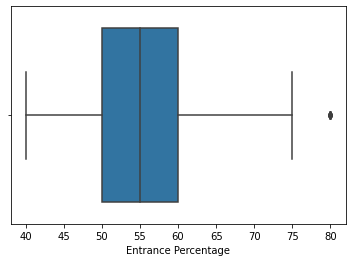

In [75]:
sns.boxplot(df1['Entrance Percentage'])    

# handling outliers

In [76]:
df1['Entrance Percentage'] = np.where(df1['Entrance Percentage'] >70,40,df1['Entrance Percentage'])

<AxesSubplot:xlabel='Entrance Percentage'>

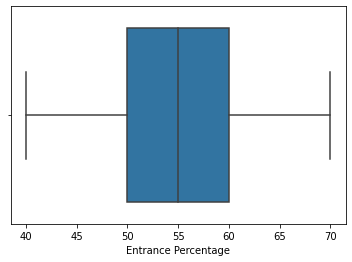

In [77]:
sns.boxplot(df1['Entrance Percentage'])

# Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()  

In [80]:
df['University Name'] = le.fit_transform(df1['University Name'])
df['District'] = le.fit_transform(df1['District'])
df['Department'] = le.fit_transform(df1['Department'])
df['Output'] = le.fit_transform(df1['Output'])

In [81]:
df.head() 

,S.NO,University Name,12th Percentage,Entrance Percentage,Department,Output,District
0,1,0,55,80,1,1,0
1,2,0,85,80,1,1,0
2,3,0,74,80,1,1,0
3,4,0,92,80,1,1,0
4,5,0,19,80,1,0,0


In [82]:
x = df.iloc[:,1:5]

In [83]:
x.head()

,University Name,12th Percentage,Entrance Percentage,Department
0,0,55,80,1
1,0,85,80,1
2,0,74,80,1
3,0,92,80,1
4,0,19,80,1


In [84]:
y = df.iloc[:,5:6]
y.head()

,Output
0,1
1,1
2,1
3,1
4,0


# Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-1.7231651 ,  0.03043413,  2.68165558, -0.72381785],
       [-1.7231651 ,  1.47988244,  2.68165558, -0.72381785],
       [-1.7231651 ,  0.94841806,  2.68165558, -0.72381785],
       ...,
       [ 1.69263233, -0.93586475, -1.79391555, -0.72381785],
       [ 1.69263233,  1.67314222, -1.79391555, -0.72381785],
       [ 1.69263233, -1.61227396, -1.79391555, -0.72381785]])

# Splitting dataset into train and test

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =0)

In [87]:
x_train

,University Name,12th Percentage,Entrance Percentage,Department
738,36,55,55,4
351,17,63,50,1
385,18,45,50,0
776,37,78,65,2
250,12,60,75,4
...,...,...,...,...
763,36,44,55,4
192,9,59,50,0
629,32,93,55,4
559,29,29,50,4


In [88]:
y_test

,Output
453,1
85,0
545,1
312,0
334,1
...,...
402,1
92,1
261,0
493,0


# Training And Test  the model

In [89]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [90]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [91]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[115,  15],
       [ 15,  92]])

In [92]:
accuracy_score(y_pred,y_test)  * 100

87.34177215189874

In [93]:
classifier.score(x_train,y_train) *100

89.85507246376811

In [94]:
classifier.score(x_test,y_test)*100

87.34177215189874

# Deploy the model

In [95]:
#!pip install -U ibm-watson-machine-learning

In [96]:
from ibm_watson_machine_learning import APIClient

In [97]:
wml_credentials = {
    "apikey" : "L2b9n_p3zo6q3O4y9dDEELnvPDoruLIdD0lsYBSlicy2",
    "url" : "https://eu-de.ml.cloud.ibm.com"
}

In [98]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------  ------------------------
ID                                    NAME         CREATED
5b4705a6-2256-4a6c-bb0f-a6e46388c4bb  vidhyapeeth  2022-11-17T04:23:17.605Z
------------------------------------  -----------  ------------------------


In [99]:
space_id = "5b4705a6-2256-4a6c-bb0f-a6e46388c4bb"

In [100]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [101]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [102]:
model_name = "demo_model"
deployment_name = "demo_deploy"
model = classifier
model

SVC(kernel='linear', random_state=0)

In [103]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [104]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME : model_name,
    wml_client.repository.ModelMetaNames.TYPE : "scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [105]:
model_details = wml_client.repository.store_model(
    model = model,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)

In [106]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Output',
  'schemas': {'input': [{'fields': [{'name': 'University Name',
       'type': 'int64'},
      {'name': '12th Percentage', 'type': 'int64'},
      {'name': 'Entrance Percentage', 'type': 'int64'},
      {'name': 'Department', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-17T04:26:11.553Z',
  'id': '465774f4-aa9b-49aa-a348-4731c13c19fd',
  'modified_at': '2022-11-17T04:26:14.778Z',
  'name': 'demo_model',
  'owner': 'IBMid-6610046895',
  'resource_key': 'a29d96cb-eaae-4685-a329-493d88beb972',
  'space_id': '5b4705a6-2256-4a6c-bb0f-a6e46388c4bb'},
 'system': {'warnings': []}}

: 